# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [4]:
data = pd.DataFrame({'x': x, 'y': y, 'z':z})
data

,x,y,z
0,0,0,0
1,1,2,1
2,2,4,4
3,3,6,9
4,4,8,16
...,...,...,...
95,95,190,9025
96,96,192,9216
97,97,194,9409
98,98,196,9604


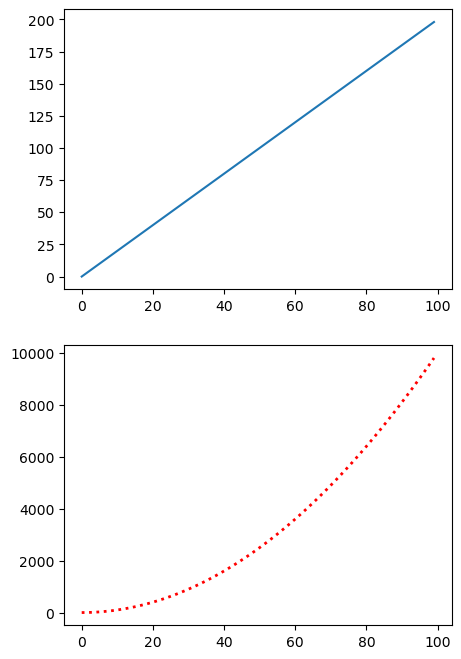

In [5]:
# Method 1
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,8),linewidth=9)
axs[0].plot(x, y,linewidth=1.5)
axs[1].plot(x, z,color='red', marker='', linestyle=':',
     linewidth=2, markersize=1)


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

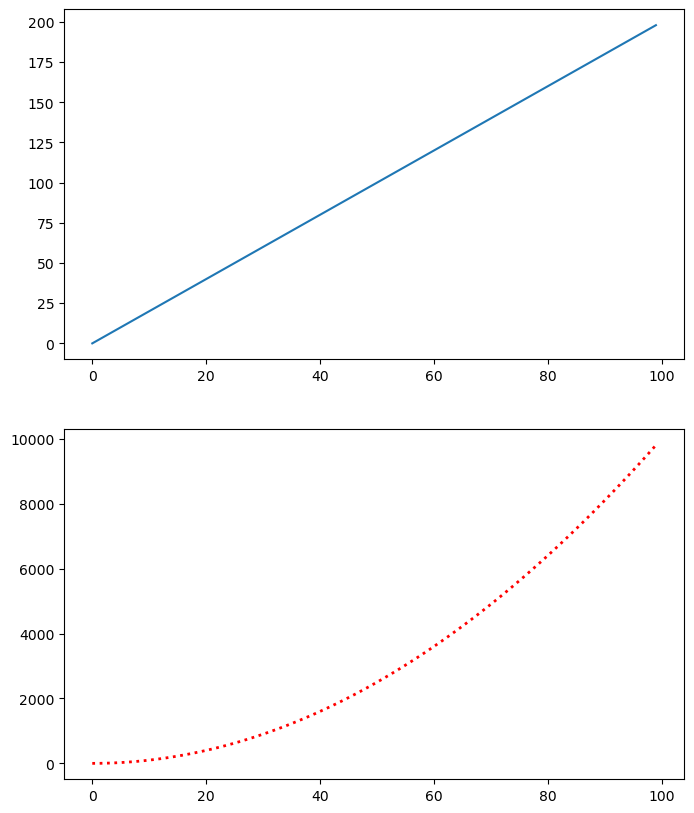

In [6]:
# Method 2
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10),linewidth=9)
axs[0].plot(x, y,linewidth=1.5)
axs[1].plot(x, z,color='red', marker='', linestyle=':',
     linewidth=2, markersize=1)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'Y')

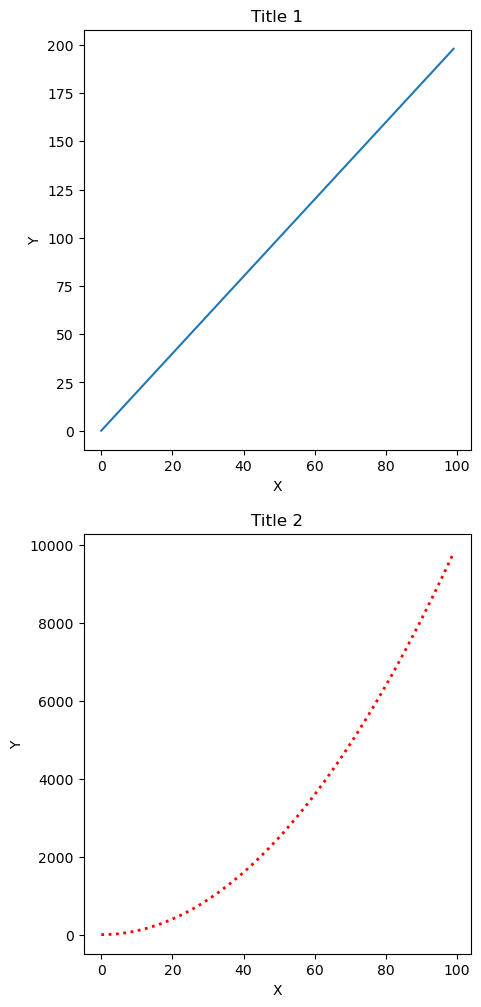

In [7]:
# your code here
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,12),linewidth=9)
axs[0].plot(x, y,linewidth=1.5)
axs[0].set_title('Title 1')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].plot(x, z,color='red', marker='', linestyle=':',
     linewidth=2, markersize=1)
axs[1].set_title('Title 2')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [8]:
# your code here
y1 = np.e ** x
data['y1'] = y1
data

,x,y,z,y1
0,0,0,0,1.000000e+00
1,1,2,1,2.718282e+00
2,2,4,4,7.389056e+00
3,3,6,9,2.008554e+01
4,4,8,16,5.459815e+01
...,...,...,...,...
95,95,190,9025,1.811239e+41
96,96,192,9216,4.923458e+41
97,97,194,9409,1.338335e+42
98,98,196,9604,3.637971e+42


'El resultado parece que me da bien, pero me surge una duda:\nHe ido probando de diferentes maneras y no soy capaz de hacer que los dos plots sean logarítmicos\no al menos que solo el primero lo sea.'

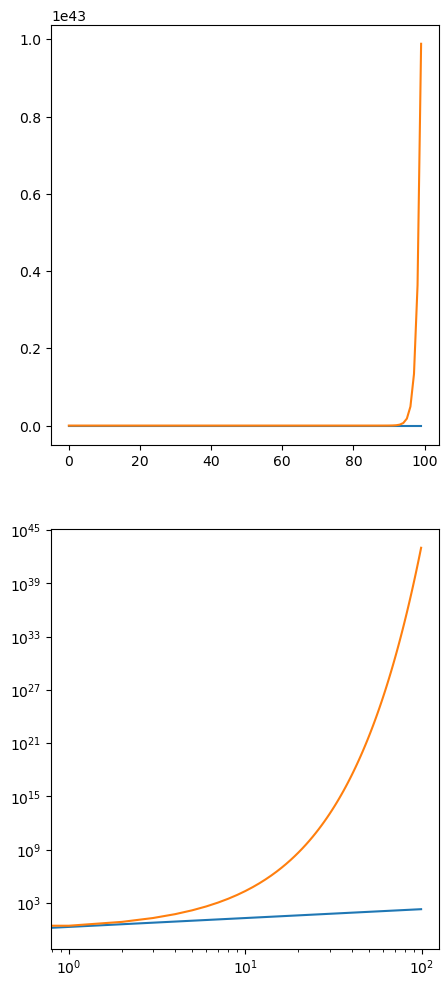

In [9]:
# your code here
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,12),linewidth=9)
axs[0].plot(x, y, x, y1, linewidth=1.5)
axs[1].plot(x, y, x, y1)
plt.yscale("log")
plt.xscale("log")

'''El resultado parece que me da bien, pero me surge una duda:
He ido probando de diferentes maneras y no soy capaz de hacer que los dos plots sean logarítmicos
o al menos que solo el primero lo sea.'''

#### As a bonus challenge, try to add a legend to the plot.

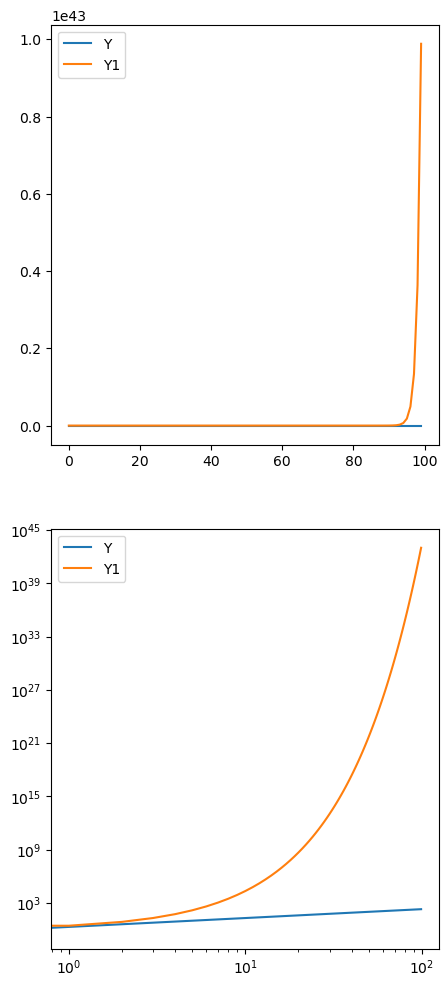

In [10]:
# your code here
# Lo divido en dos para poder distinguir las labels
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 12), linewidth=9)
axs[0].plot(x, y, label='Y', linewidth=1.5)
axs[0].plot(x, y1, label='Y1', linewidth=1.5)
axs[1].plot(x, y, label='Y')
axs[1].plot(x, y1, label='Y1')

plt.yscale("log")
plt.xscale("log")

axs[0].legend()
axs[1].legend()



## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [11]:
# your code here
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [12]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [13]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
median_month_steps = fitbit.groupby(['Months_encoded'])['Steps'].median()
print(median_month_steps)
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fitbit['Day type'] = fitbit['Days'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday'] else 'weekend')
median_day_steps = fitbit.groupby(['Day type'])['Steps'].median()
print(median_day_steps)

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64
Day type
weekday    10445.5
weekend     9998.0
Name: Steps, dtype: float64


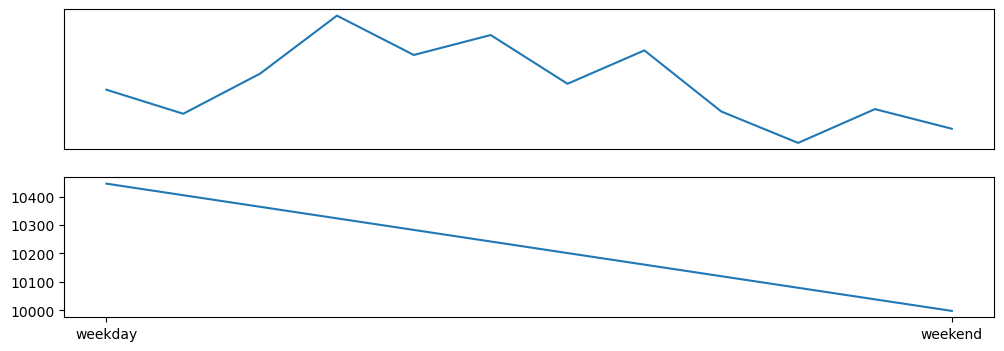

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,4),linewidth=9)
plt.sca(ax[0])
plt.yticks([])
plt.xticks([]) 
plt.plot(median_month_steps) 
  
plt.sca(ax[1]) 
plt.plot(median_day_steps)

# Aparte de quitar los valores de los ejes, no se que mas puede hacer el xticks/yticks

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

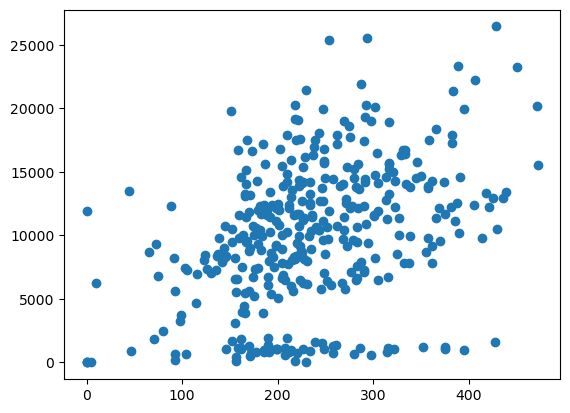

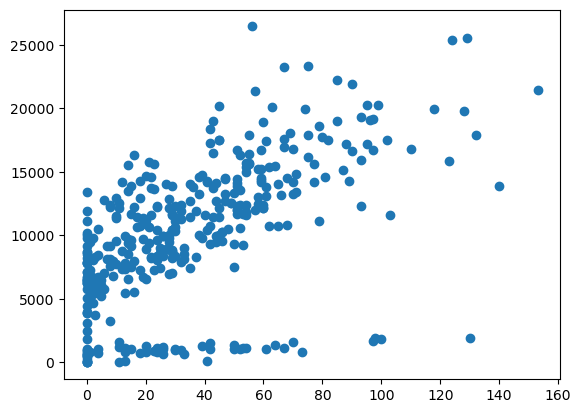

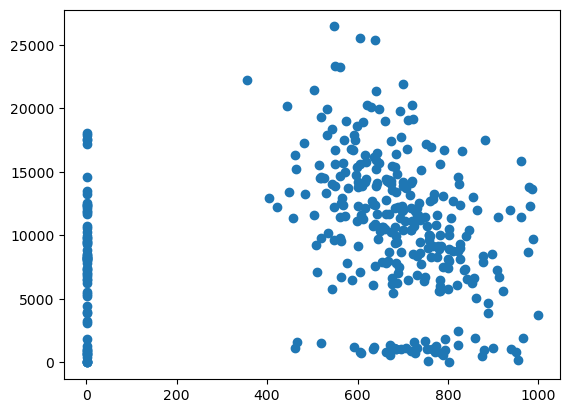

In [21]:
x = ['Minutes Lightly Active','Minutes Very Active', 'Minutes Sedentary']
for i in x:
    plt.scatter(fitbit[i], fitbit['Steps'])
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [23]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [24]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [74]:
# NUMERICAL VARIABLES
# your code here
titanic_number = titanic.select_dtypes('number')
titanic_number

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [26]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [32]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<Axes: xlabel='Age'>

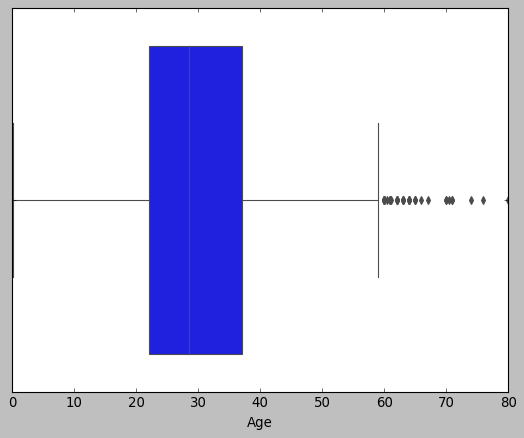

In [37]:
# your code here
sns.boxplot(x=titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

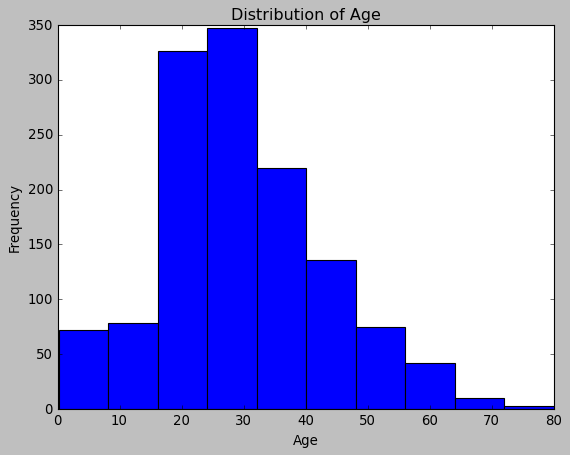

In [38]:
# your code here
# Crea un histograma de la columna 'age'
plt.hist(titanic['Age'], bins=10, edgecolor='black')

# Configura etiquetas y título
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Muestra el histograma
plt.show()

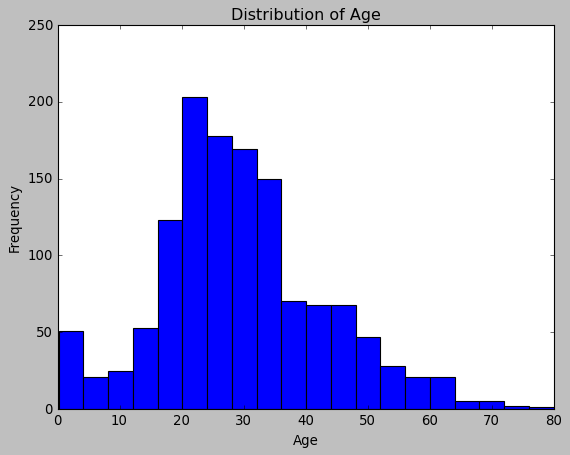

In [39]:
# your code here
# Crea un histograma de la columna 'age'
plt.hist(titanic['Age'], bins=20, edgecolor='black')

# Configura etiquetas y título
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Muestra el histograma
plt.show()

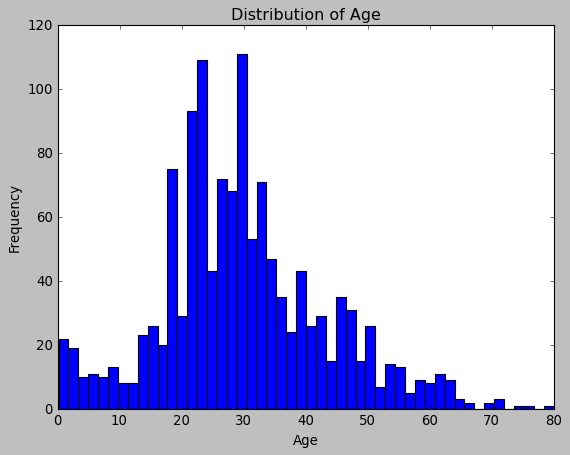

In [40]:
# your code here
# Crea un histograma de la columna 'age'
plt.hist(titanic['Age'], bins=50, edgecolor='black')

# Configura etiquetas y título
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Muestra el histograma
plt.show()

#### How does the bin size affect your plot?

In [41]:
"""
Cuanto más grande sea el número más cantidad de bins hay, es decir, más pequeños son los intervalos de los números
"""

'\nCuanto más grande sea el número más cantidad de bins hay, es decir, más pequeños son los intervalos de los números\n'

#### Use seaborn to show the distribution of column `Age`.

<Axes: ylabel='Age'>

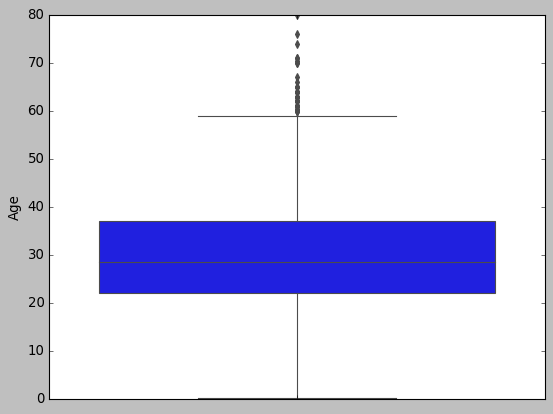

In [43]:
# your code here
sns.boxplot(y=titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

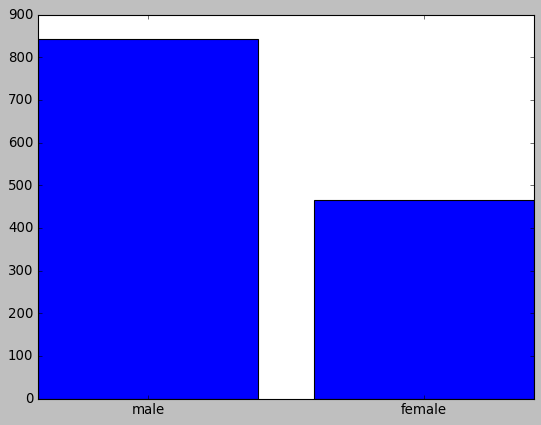

In [50]:
# Method 1 - matplotlib
# your code here
gender_counts = titanic['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts)

<Axes: xlabel='Gender', ylabel='count'>

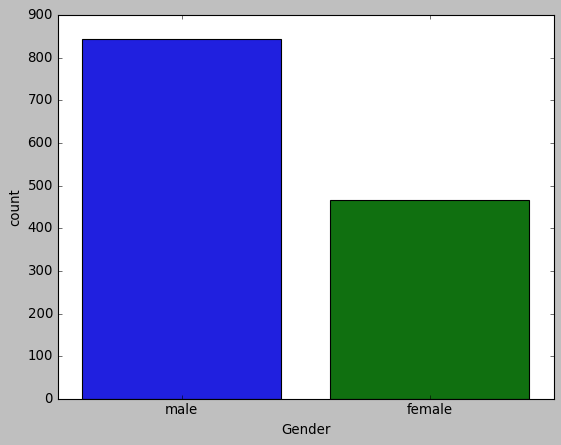

In [44]:
# Method 2 - seaborn
# your code here
sns.countplot(x='Gender', data=titanic)

#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass', ylabel='count'>

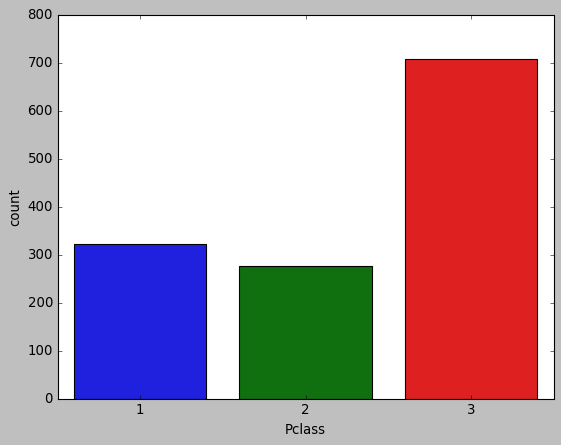

In [52]:
# your code here
sns.countplot(x='Pclass', data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Axes: ylabel='Age'>

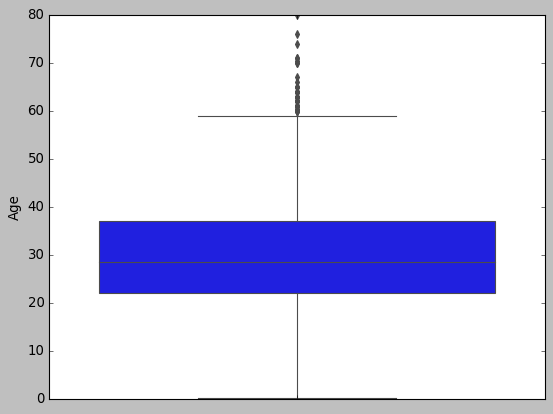

In [54]:
# your code here
sns.boxplot(y='Age',data=titanic)

In [ ]:
"""
Boxplot para tener la media, la mediana y detectar outliers
"""

#### What does the last plot tell you about the feature `Age`?

In [55]:
"""
Que la media está en torno a los 29 años, hay outliers por encima de los 60 y los valores entre el Q1 y el Q3 están entre 22 años y 36 años
"""

'\nQue la media está en torno a los 29 años, hay outliers por encima de los 60 y los valores entre el Q1 y el Q3 están entre 22 años y 36 años\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age', ylabel='Density'>

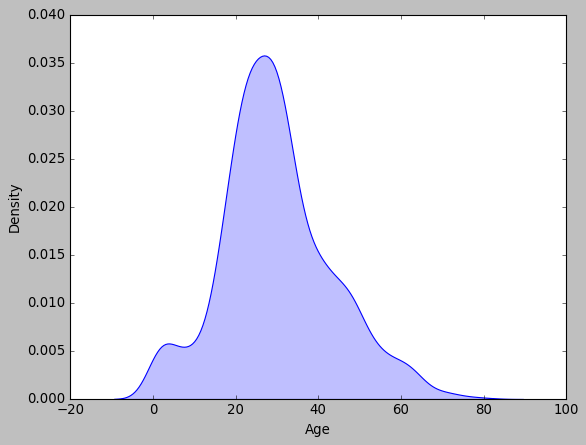

In [61]:
# your code here

sns.kdeplot(titanic['Age'], fill=True)

<Axes: xlabel='Age', ylabel='Count'>

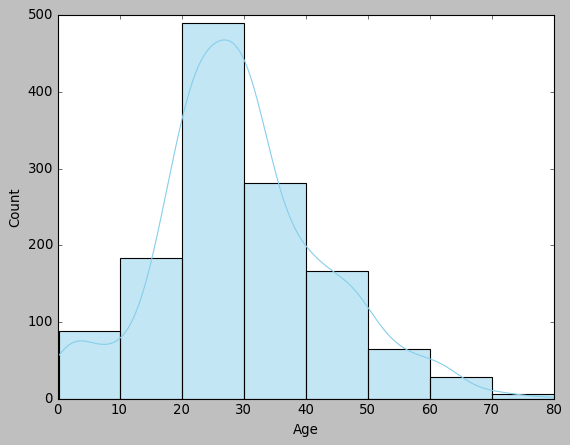

In [67]:
sns.histplot(titanic['Age'], bins=8, kde=True, color='skyblue')

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Que hay casi tantos niños como mayores de 50 años
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

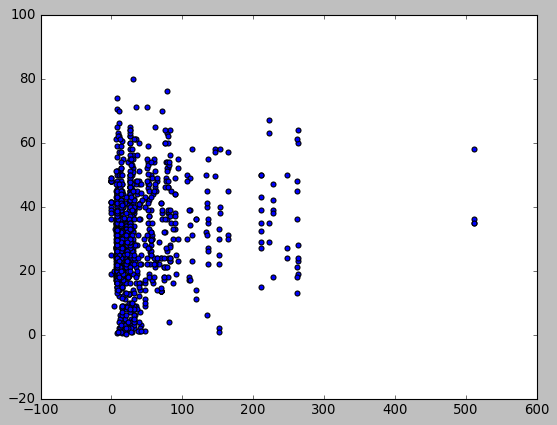

In [71]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Fare'], titanic['Age'])

<Axes: xlabel='Age', ylabel='Fare'>

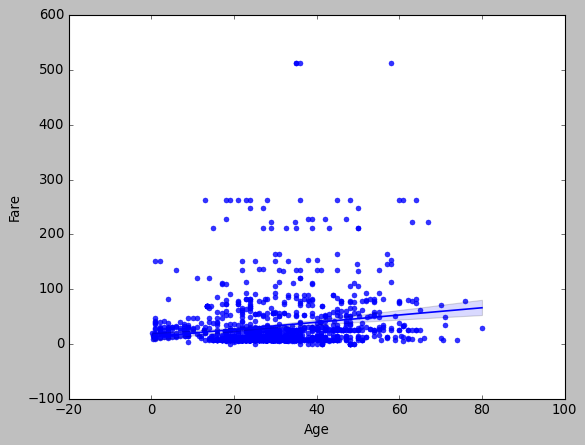

In [72]:
# Method 2 - seaborn
# your code here
sns.regplot(x='Age', y='Fare', data=titanic)

#### Plot the correlation matrix using seaborn.

<Axes: >

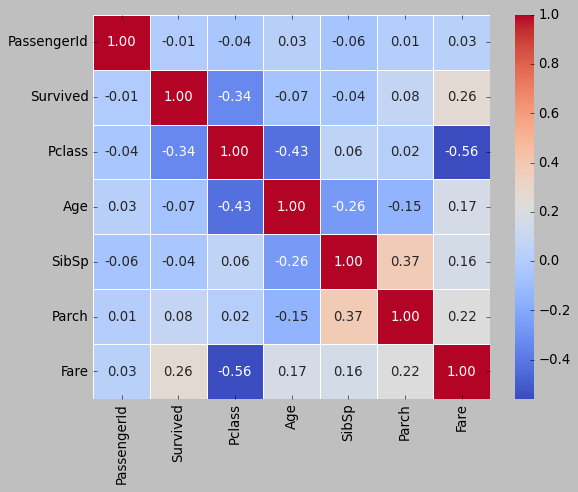

In [76]:
# your code here
# Solo se pueden hacer correlaciones de las numéricas:
sns.heatmap(titanic_number.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#### What are the most correlated features?

In [ ]:
"""
Pclass and Fare, then Pclass and Age, and lastly Pclass and Survived
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Pclass', ylabel='Age'>

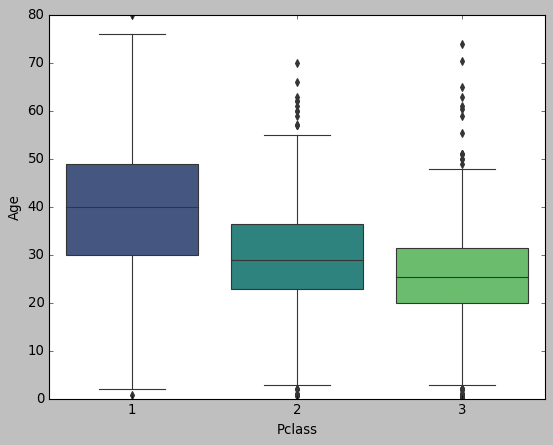

In [77]:
# your code here
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='viridis')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

/Users/tomasmorin/miniconda3/envs/m2_env/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/tomasmorin/miniconda3/envs/m2_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


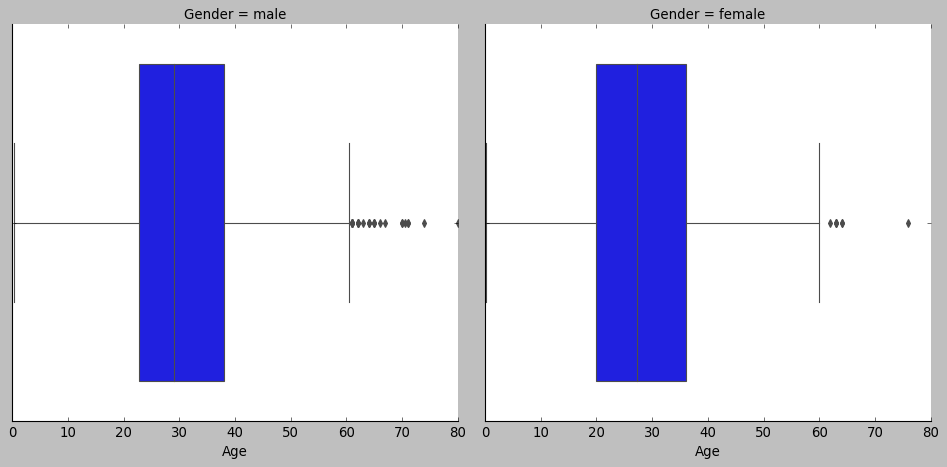

In [82]:
# your code here
g = sns.FacetGrid(titanic, col='Gender', height=6, aspect=1)
g.map(sns.boxplot, 'Age')